<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/Week%205/Aryan_Shukla_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting drive for dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV file

In [3]:
df = pd.read_csv("/content/drive/MyDrive/input/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Taking Sample from dataframe

In [4]:
df.sample(5)

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
198792,NaN,3.147169,0.168235,1.749332,150.597265,319.991656,2.617704,3.676635,5.583266,8010.0,...,NaN,NaN,NaN,NaN,NaN,1.634910,MBA,0.176532,2039.288083,255.800247
644414,NaN,3.147094,0.150248,0.822539,203.941923,237.914361,2.674248,3.619940,5.583067,3567.0,...,NaN,NaN,NaN,NaN,NaN,1.690180,MBA,0.176539,2039.215230,224.226921
616931,NaN,2.295793,0.189308,6.488042,66.924467,304.403523,1.861182,2.730404,3.478622,48.0,...,NaN,NaN,NaN,NaN,NaN,0.870156,MBA,0.283338,1270.566812,275.427105
617439,NaN,2.203038,0.346482,7.988119,28.795663,295.520247,1.439724,2.966351,3.269949,5792.0,...,NaN,NaN,NaN,NaN,NaN,0.452862,MCA,0.301419,1194.349050,7.583253
108331,NaN,2.245826,0.238100,6.860895,78.211306,224.848656,1.711096,2.780556,3.365676,6298.0,...,NaN,NaN,NaN,NaN,NaN,0.703086,MBA,0.292846,1229.313158,64.910235


### Details of Some Columns
- name- Name of asteroids
- a - Semi major axis
- e - eccentricity
- i - inclination with respect to x-y elliptical plane
- om - longitude of the ascending node
- w - argument of perihelion
- q - perihelion distance
- ad - aphelion distance
- per_y - orbital period
- data_Arc - data arc span(d)
- condition_Code = orbit condition code
- n_obs_used - number of observation used
- H - absolute magnitude parameter
- neo-Near earth object
- pha - Physically hazardous object
- diameter - diameter of asteroids
- extent - Object bi/tri axial ellipsoid dimensions(Km)
- albedo - geometric albedo
- rot_per - rotation period

In [5]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']
No. of variables are 31


### There are entries with null diameters

In [6]:
# for an instance 
df[df['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [7]:
print("Entries with null diameter are :", df['diameter'].isnull().sum())
print("Entries with not null diameter are :", df['diameter'].notnull().sum())

Entries with null diameter are : 702078
Entries with not null diameter are : 137636


- __Cleaning__:
<br/> 
__Problem__: 'diameter' is string type, I will convert to numeric. This gave errors for some diameters because they were corrupted, so I added the argument "errors='coerce'" to set corrupted diameters to nan, and later dropped those.
<br/> 
Dropping irrelevent features and choosing my battles:
<br/> 
dropping names because I dont believe asteroids are useful feature.
<br/> 
Dropping all features with more than half nan values
<br/> 
dropping condition_code and neo and pha because most seems to be 0 or nan.
<br/> 
Replace nans entries with mean value of column

In [8]:
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce') #transforming to numeric, setting errors to NaN
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df=df[df['diameter'].notnull()]

In [9]:
# after dropping the NaN val
print(df.shape)

(137635, 31)


In [10]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']
No. of variables are 31


In [11]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code'],axis=1)
df = df.drop(['neo','pha'],axis=1)

In [12]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,class,n,per,ma
53491,2.600671,0.205836,14.248050,121.313092,219.757542,2.065359,3.135983,4.194076,8691.0,1297,14.5,3.922,0.219,1.073890,MBA,0.235004,1531.886315,349.405097
70637,2.573530,0.010331,10.183436,117.666042,247.791547,2.546944,2.600116,4.128593,9239.0,1161,14.4,5.435,0.137,1.544170,MBA,0.238732,1507.968612,287.148629
226996,2.776017,0.052800,5.396948,95.486349,331.335309,2.629443,2.922590,4.625315,7004.0,413,15.4,4.869,0.057,1.644740,MBA,0.213094,1689.396419,52.375045
282498,2.317931,0.264986,24.848696,136.878059,249.956707,1.703711,2.932151,3.529060,6085.0,215,16.5,2.915,0.070,0.829599,MBA,0.279289,1288.988987,22.752926
9998,2.837560,0.071024,3.199622,76.364350,234.783123,2.636025,3.039094,4.779976,16670.0,1992,13.0,7.148,0.262,1.622380,MBA,0.206199,1745.886190,237.873472


In [14]:
df = df.drop(['albedo','H','class'],axis = 1)

In [15]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,diameter,moid,n,per,ma
73602,2.617286,0.252145,6.140644,32.005181,304.145880,1.957351,3.277221,4.234332,16680.0,533,4.114,0.955345,0.232770,1546.589831,293.248167
142511,2.596861,0.196836,7.800923,30.048042,283.900060,2.085705,3.108018,4.184864,6265.0,415,2.077,1.088180,0.235522,1528.521697,48.166840
65042,3.000787,0.087138,2.876173,171.882998,49.499574,2.739304,3.262270,5.198295,9010.0,503,4.231,1.732250,0.189606,1898.677079,9.935027
122829,2.359787,0.125685,6.396726,183.136363,129.677042,2.063198,2.656375,3.625078,21303.0,634,1.635,1.055700,0.271891,1324.059683,95.016458
67629,2.346305,0.143474,8.975991,152.630917,30.317031,2.009671,2.682938,3.594056,9237.0,845,2.335,1.019160,0.274238,1312.728951,257.140937


In [16]:
# As discussed in meet some features are in form e^x so taking log to find trend in diameter
df['diameter']= df['diameter'].apply(np.log)
for column in df.columns.drop(['diameter']):
    if(column != "class"):
      df['log('+column+')']=df[column].apply(np.log)
df = df.dropna(axis=1)


In [17]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
25733,2.992173,0.051006,9.712044,194.408887,289.287723,2.839555,3.144791,5.175929,8542.0,1279,...,5.667422,1.043647,1.145748,1.644019,9.052750,7.153834,0.627360,-1.658497,7.544601,5.568106
71255,2.983133,0.083767,5.507480,274.674026,26.064400,2.733244,3.233021,5.152488,7706.0,1160,...,3.260570,1.005489,1.173417,1.639480,8.949755,7.056175,0.541242,-1.653958,7.540062,4.100736
10803,2.761194,0.221217,9.628623,71.119675,340.287840,2.150372,3.372016,4.588319,15004.0,1543,...,5.829792,0.765641,1.215511,1.523514,9.616072,7.341484,0.151811,-1.537992,7.424096,5.651186
6942,2.197366,0.114075,4.101378,227.485728,239.985163,1.946702,2.448030,3.257329,23820.0,1858,...,5.480577,0.666136,0.895283,1.180908,10.078281,7.527256,-0.033070,-1.195386,7.081490,4.751946
57025,3.169447,0.241271,17.983307,67.245940,240.966983,2.404753,3.934141,5.642654,7609.0,760,...,5.484660,0.877447,1.369693,1.730355,8.937087,6.633318,0.368573,-1.744833,7.630937,5.156300


In [18]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'diameter', 'moid', 'n', 'per', 'ma', 'log(a)', 'log(e)', 'log(i)', 'log(om)', 'log(w)', 'log(q)', 'log(ad)', 'log(per_y)', 'log(data_arc)', 'log(n_obs_used)', 'log(moid)', 'log(n)', 'log(per)', 'log(ma)']
No. of variables are 29


### Correlation analysis

In [19]:
df.corr()['diameter'].abs().sort_values(ascending=False)

diameter           1.000000
log(a)             0.563616
log(per_y)         0.563616
log(n)             0.563616
log(per)           0.563616
log(q)             0.543737
log(moid)          0.528689
n                  0.525392
q                  0.522404
moid               0.521095
data_arc           0.519390
n_obs_used         0.511250
log(ad)            0.477252
log(n_obs_used)    0.433656
log(data_arc)      0.298793
a                  0.195634
e                  0.185047
log(e)             0.157921
ad                 0.112606
i                  0.096037
log(i)             0.088749
per                0.046649
per_y              0.046649
ma                 0.030946
log(ma)            0.023154
log(w)             0.006008
w                  0.005310
om                 0.001478
log(om)            0.000169
Name: diameter, dtype: float64

### Splitting

In [20]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [21]:
X_train.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
105142,3.241308,0.224789,16.933373,260.422029,71.026570,2.512696,3.969920,5.835642,6781.0,594,...,4.263054,0.921356,1.378746,1.763984,8.821880,6.386879,0.445320,-1.778462,7.664566,4.240899
635403,2.534661,0.039409,8.527629,267.697893,217.480669,2.434771,2.634550,4.035413,1.0,10,...,5.382110,0.889853,0.968713,1.395109,0.000000,2.302585,0.375556,-1.409587,7.295691,4.786538
182027,2.431499,0.250322,10.804514,169.354916,316.552257,1.822840,3.040158,3.791573,7553.0,357,...,5.757488,0.600396,1.111910,1.332781,8.929700,5.877736,-0.158312,-1.347259,7.233363,3.274327
256276,2.592118,0.189110,10.366667,240.737796,85.445375,2.101922,3.082314,4.173403,4428.0,218,...,4.447877,0.742852,1.125681,1.428732,8.395703,5.384495,0.113525,-1.443210,7.329314,4.226544
334956,2.316042,0.154901,23.072863,150.165764,51.639675,1.957285,2.674800,3.524747,5682.0,271,...,3.944290,0.671558,0.983875,1.259809,8.645059,5.602119,0.018184,-1.274287,7.160391,4.402918


### Normalization

In [22]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

### Trying Linear Regression

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = r2_score(Y_test,Y_pred_lr)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.753
rms value for the regression  : 0.321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


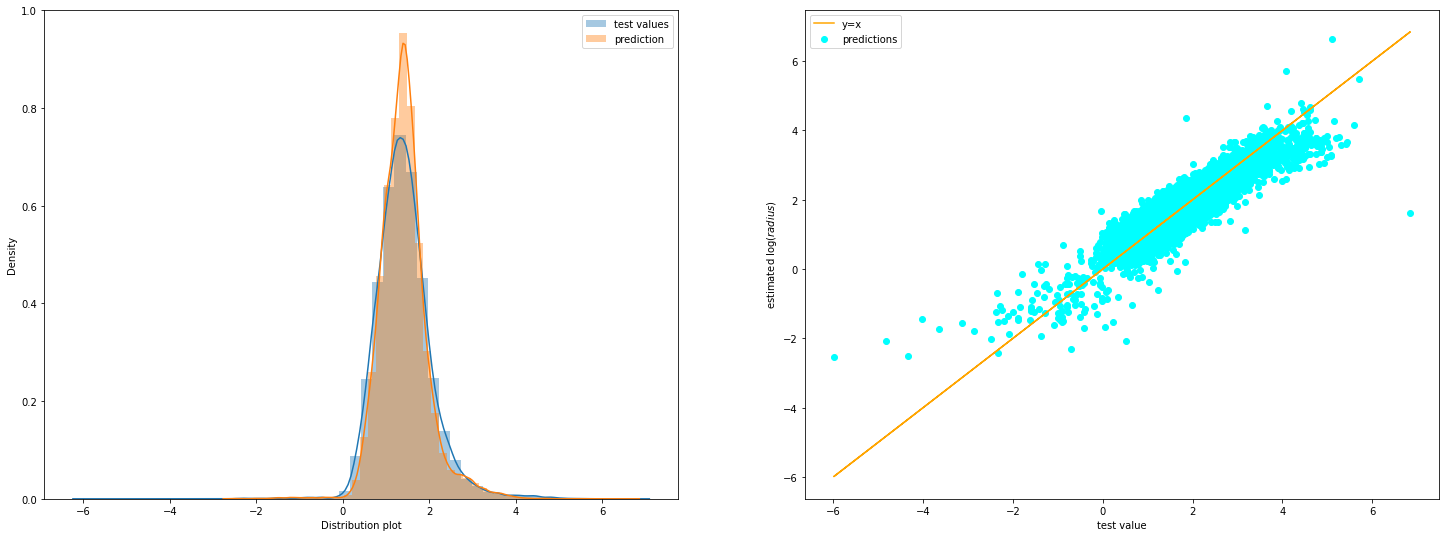

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Trying XGBoost

In [25]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test_norm)

### Scoring
score_xgb = r2_score(Y_test,Y_pred_xgb)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.63
rms value for the regression  : 0.393


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


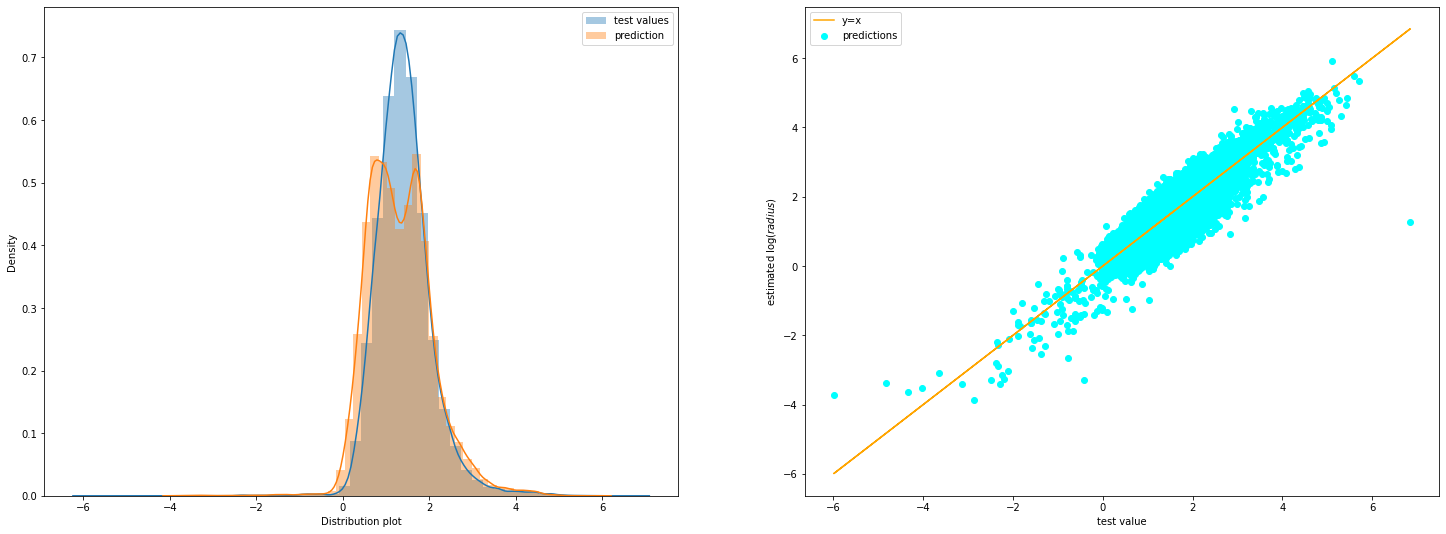

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_xgb ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_xgb, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### SVM

In [27]:
from sklearn import svm
svmreg = svm.SVR()

### Training
svmreg.fit(X_train_norm,np.ravel(Y_train))

### Predicting
Y_pred_svm = svmreg.predict(X_test_norm)
### Scoring
score_svm = r2_score(Y_test,Y_pred_svm)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.768
rms value for the regression  : 0.311


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


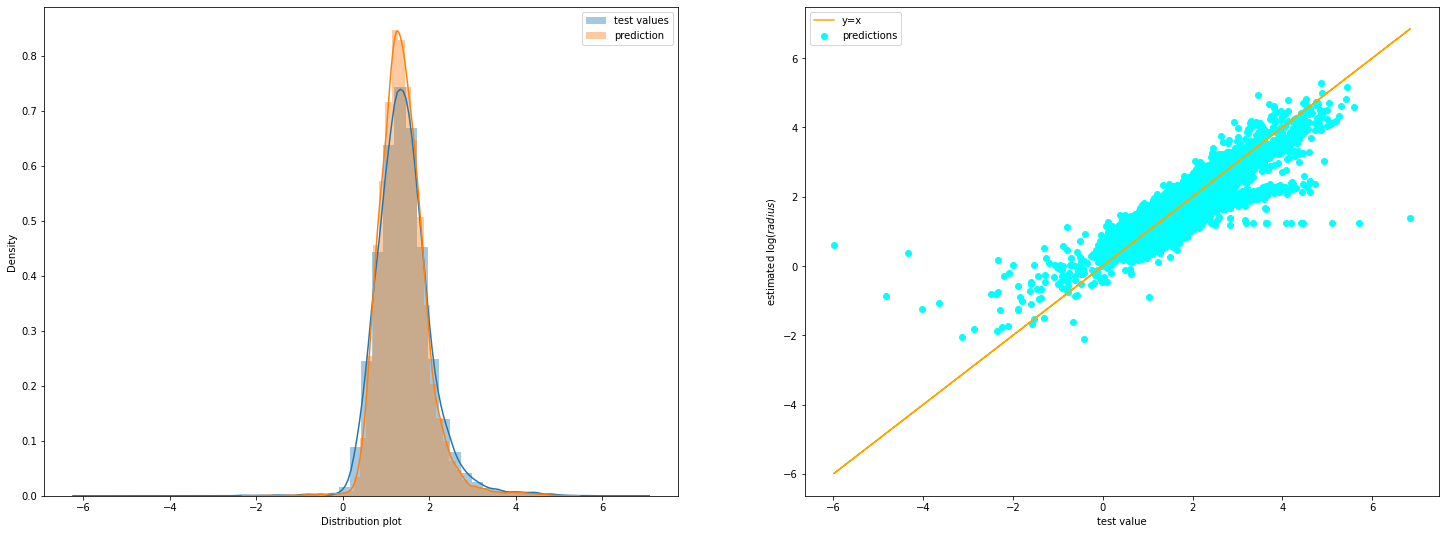

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_svm ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_svm, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Decision tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=0)

### Training
treereg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_tree = treereg.predict(X_test_norm)
### Scoring
score_tree = r2_score(Y_test,Y_pred_tree)
print("R^2 value for the regression  :",  round(score_tree,3))
rms = mean_squared_error(Y_test, Y_pred_tree, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.543
rms value for the regression  : 0.436


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


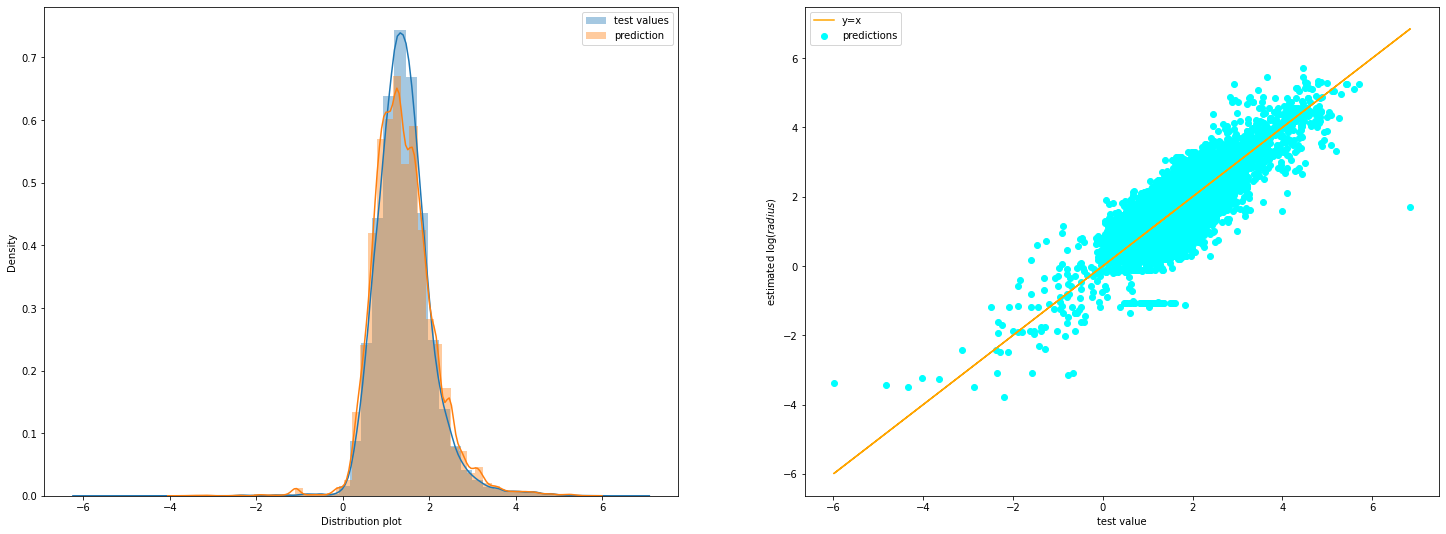

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_tree ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_tree, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Random Forest regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=32, n_estimators=50)

### Training
forest.fit(X_train_norm,Y_train)

### Predicting
Y_pred_forest = forest.predict(X_test_norm)
### Scoring
score_forest = r2_score(Y_test,Y_pred_forest)
print("R^2 value for the regression  :",  round(score_forest,3))
rms = mean_squared_error(Y_test, Y_pred_forest, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.812
rms value for the regression  : 0.28


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


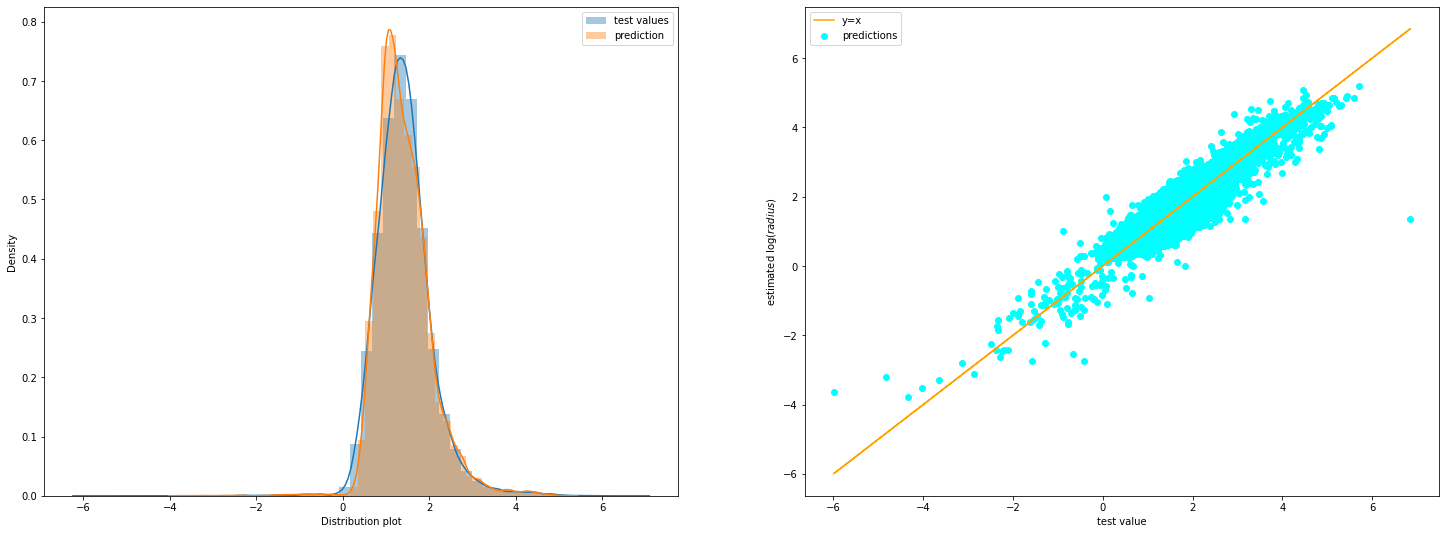

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_forest ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_forest, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Neural Network regression

In [33]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Adam(learning_rate=0.005)
model = Sequential()
model.add(Dense(24,activation='tanh',input_dim=X_train_norm.shape[1]))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

### Training
model.fit(X_train_norm,Y_train,epochs=100,batch_size=256,verbose=False)

### Predicting
Y_pred_nn = model.predict(X_test_norm)

### Scoring
score_nn = r2_score(Y_test,Y_pred_nn)
print("R^2 value for the regression  :",  round(score_nn,3))
rms = mean_squared_error(Y_test, Y_pred_nn, squared=False)
print("rms value for the regression  :",  round(rms,3))

861/861 [==============================] - 1s 1ms/step
R^2 value for the regression  : 0.728
rms value for the regression  : 0.337


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


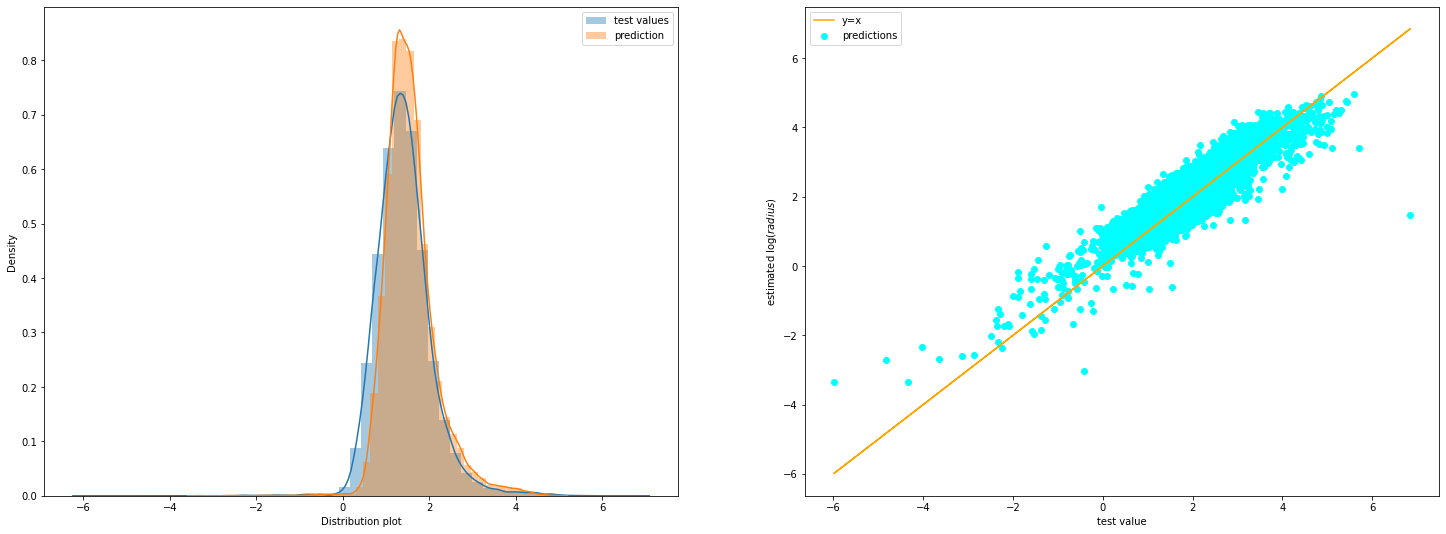

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_nn ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_nn, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Bagging

In [35]:
from sklearn.ensemble import BaggingRegressor
baggreg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)

### Training
baggreg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_bagg = baggreg.predict(X_test_norm)
### Scoring
score_bagg = r2_score(Y_test,Y_pred_bagg)
print("R^2 value for the regression  :",  round(score_bagg,3))
rms = mean_squared_error(Y_test, Y_pred_bagg, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.804
rms value for the regression  : 0.286


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


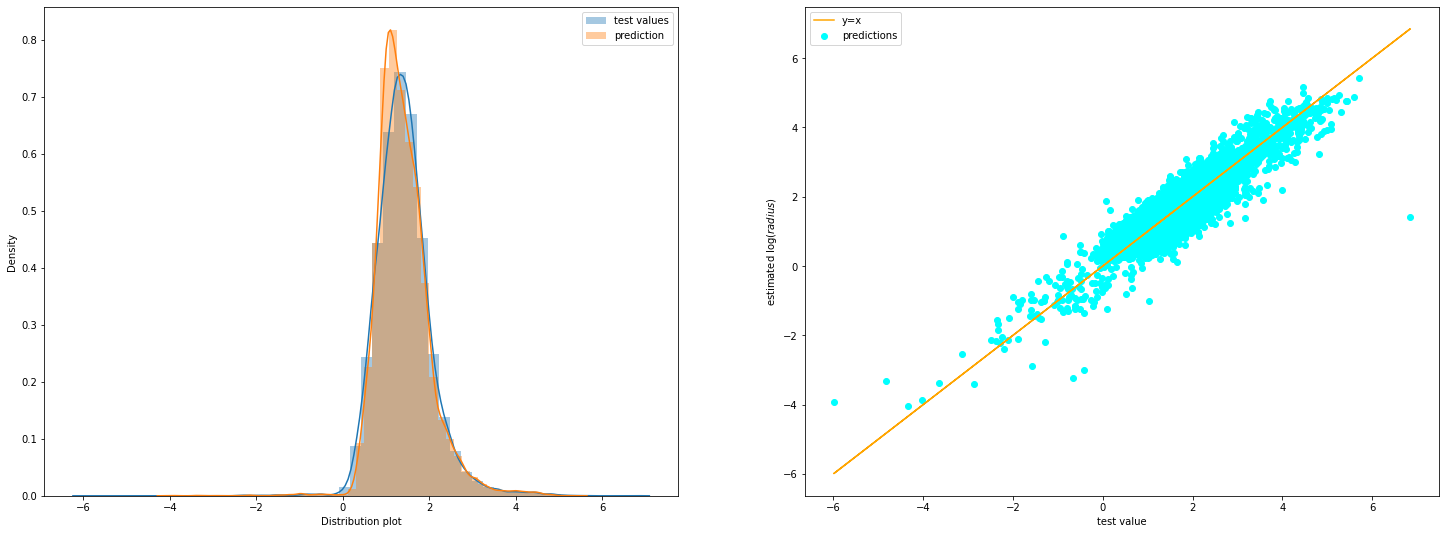

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_bagg ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_bagg, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
boostreg = GradientBoostingRegressor(random_state=0)

### Training
boostreg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_boost = boostreg.predict(X_test_norm)
### Scoring
score_boost = r2_score(Y_test,Y_pred_bagg)
print("R^2 value for the regression  :",  round(score_boost,3))
rms = mean_squared_error(Y_test, Y_pred_boost, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.804
rms value for the regression  : 0.319


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


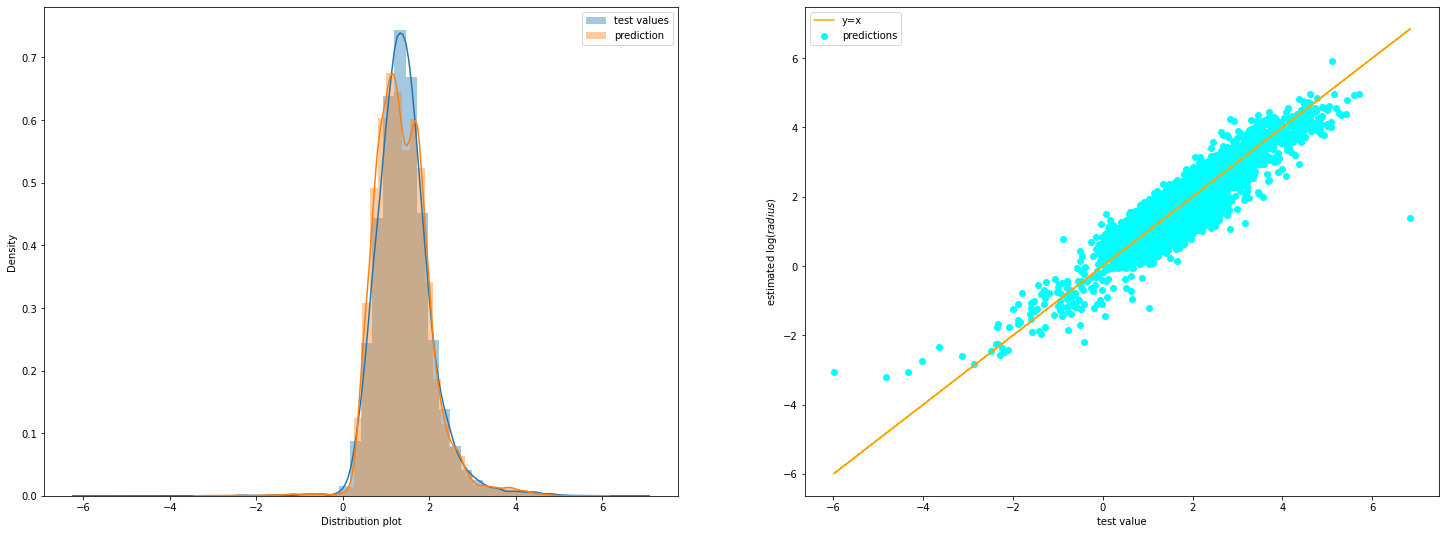

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_boost ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_boost, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()